In [1]:
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt

from tqdm import tqdm

from positioning import classicalfix_directbearing_mle, \
                        classicalfix_diffbearing_mle, \
                        classicalfix_directrange_mle, \
                        classicalfix_diffrange_mle, \
                        classicalfix_directbearing_crlb, \
                        classicalfix_diffbearing_crlb, \
                        classicalfix_directrange_crlb, \
                        classicalfix_diffrange_crlb

In [2]:
x = np.linspace(-4,-3, 20)
y = np.linspace(9,10, 20)
hdg = np.zeros(x.shape) 

L = 1.6

In [3]:
x = np.concatenate((np.linspace(-1,-3, 5), np.linspace(-3, -2, 5), np.linspace(-2,3, 5), np.linspace(3,0, 5)))
y = np.concatenate((np.linspace(3, 10, 5), np.linspace(10, 16, 5), np.linspace(16,14, 5), np.linspace(14,7, 5)))
hdg = np.zeros(x.shape) 

L = 1.6

In [4]:
dLL = np.sqrt(x**2+y**2)
dRL = np.sqrt((x-L)**2+y**2)
dLR = np.sqrt((x+L)**2+y**2)
dRR = np.sqrt((x+L-L)**2+y**2)

aLL = np.rad2deg(np.arctan2(x,y))
aRL = np.rad2deg(np.arctan2((x-L),y))
aLR = np.rad2deg(np.arctan2((x+L),y))
aRR = np.rad2deg(np.arctan2((x+L-L),y))

dscl = 0.01
ascl = 0.03

In [5]:
iterations = 10000;
sz = 20

est_x_directbearing = np.zeros((iterations, sz))
est_y_directbearing = np.zeros((iterations, sz))
est_x_diffbearing   = np.zeros((iterations, sz))
est_y_diffbearing   = np.zeros((iterations, sz))
est_x_directrange   = np.zeros((iterations, sz))
est_y_directrange   = np.zeros((iterations, sz))
est_x_diffrange     = np.zeros((iterations, sz))
est_y_diffrange     = np.zeros((iterations, sz))

crlb_x_directbearing = np.zeros((sz))
crlb_y_directbearing = np.zeros((sz))
crlb_x_diffbearing   = np.zeros((sz))
crlb_y_diffbearing   = np.zeros((sz))
crlb_x_directrange   = np.zeros((sz))
crlb_y_directrange   = np.zeros((sz))
crlb_x_directrange_a = np.zeros((sz))
crlb_y_directrange_a = np.zeros((sz))
crlb_x_diffrange     = np.zeros((sz))
crlb_y_diffrange     = np.zeros((sz))

for j in tqdm(range(0, iterations)):
    for i in range(0, y.shape[0]):
        d_rxL_txL = dLL + dscl*np.random.randn(dLL.shape[0])
        d_rxR_txL = dRL + dscl*np.random.randn(dLL.shape[0])
        d_rxL_txR = dLR + dscl*np.random.randn(dLL.shape[0])
        d_rxR_txR = dRR + dscl*np.random.randn(dLL.shape[0])

        deld_rxLR_txL = d_rxL_txL - d_rxR_txL
        deld_rxLR_txR = d_rxL_txR - d_rxR_txR

        aoa_rxL_txL = aLL + ascl*np.random.randn(aLL.shape[0])
        aoa_rxR_txL = aRL + ascl*np.random.randn(aLL.shape[0])
        aoa_rxL_txR = aLR + ascl*np.random.randn(aLL.shape[0])
        aoa_rxR_txR = aRR + ascl*np.random.randn(aLL.shape[0])

        delaoa_rxLR_txL = aoa_rxL_txL - aoa_rxR_txL
        delaoa_rxLR_txR = aoa_rxL_txR - aoa_rxR_txR
        
        est_x_directbearing[j,i], est_y_directbearing[j,i] = classicalfix_directbearing_mle(aoa_rxL_txL[i], aoa_rxR_txL[i], L)
        est_x_diffbearing[j,i], est_y_diffbearing[j,i]     = classicalfix_diffbearing_mle(delaoa_rxLR_txL[i], delaoa_rxLR_txR[i], L)
        est_x_directrange[j,i], est_y_directrange[j,i]     = classicalfix_directrange_mle(d_rxL_txL[i], d_rxR_txL[i], L)
        est_x_diffrange[j,i], est_y_diffrange[j,i]         = classicalfix_diffrange_mle(deld_rxLR_txL[i], deld_rxLR_txR[i], L)

#        if(j==1):
#            crlb_x_directbearing[i], crlb_y_directbearing[i] = classicalfix_directbearing_crlb(np.deg2rad(ascl), np.deg2rad(ascl), x[i], y[i], L) 
#            crlb_x_diffbearing[i], crlb_y_diffbearing[i]     = classicalfix_diffbearing_crlb(np.deg2rad(ascl), np.deg2rad(ascl), x[i], y[i], L) 
#            crlb_x_directrange[i], crlb_y_directrange[i]     = classicalfix_directrange_crlb(dscl, dscl, x[i], y[i], L) 
#            crlb_x_diffrange[i], crlb_y_diffrange[i]         = classicalfix_diffrange_crlb(dscl, dscl, x[i], y[i], L) 

100%|██████████| 10000/10000 [00:17<00:00, 570.41it/s]


In [6]:
x_error_db1 = x-est_x_directbearing
y_error_db1 = y-est_y_directbearing
x_error_fb1 = x-est_x_diffbearing
y_error_fb1 = y-est_y_diffbearing
x_error_dr1 = x-est_x_directrange
y_error_dr1 = y-est_y_directrange
x_error_fr1 = x-est_x_diffrange
y_error_fr1 = y-est_y_diffrange

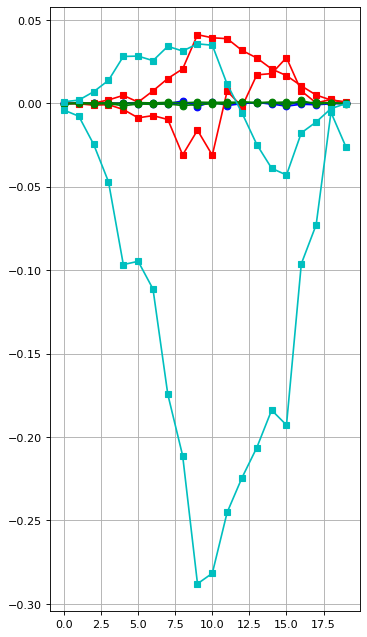

In [8]:
fig, ax = plt.subplots(figsize=(5, 10), dpi=80)
ax.plot(np.mean(x_error_db1,axis=0),'-ob')
ax.plot(np.mean(y_error_db1,axis=0),'-ob')
ax.plot(np.mean(x_error_fb1,axis=0),'-sr')
ax.plot(np.mean(y_error_fb1,axis=0),'-sr')
ax.plot(np.mean(x_error_dr1,axis=0),'-og')
ax.plot(np.mean(y_error_dr1,axis=0),'-og')
ax.plot(np.mean(x_error_fr1,axis=0),'-sc')
ax.plot(np.mean(y_error_fr1,axis=0),'-sc')
ax.grid()
plt.show()

fig, ax = plt.subplots(figsize=(5, 10), dpi=80)
ax.semilogy(np.sqrt(np.var(x_error_db1,axis=0) + np.var(y_error_db1,axis=0)),'-oC0')
ax.semilogy(np.sqrt(crlb_x_directbearing+crlb_y_directbearing),'-oC1',)
ax.semilogy(np.sqrt(np.var(x_error_fb1,axis=0) + np.var(y_error_fb1,axis=0)),'-sC0')
ax.semilogy(np.sqrt(crlb_x_diffbearing+crlb_y_diffbearing),'-sC1',)
ax.semilogy(np.sqrt(np.var(x_error_dr1,axis=0) + np.var(y_error_dr1,axis=0)),'-oC0')
ax.semilogy(np.sqrt(crlb_x_directrange+crlb_y_directrange),'-oC1',)
#ax.semilogy(np.sqrt(np.var(x_error_fr1,axis=0) + np.var(y_error_fr1,axis=0)),'-1C0')
#ax.semilogy(np.sqrt(crlb_x_diffrange+crlb_y_diffrange),'-1C1',)
ax.grid()
plt.show()